In [76]:
import numpy as np 
import numpy.linalg as LA
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import convolve,correlate

In [2]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
ruta2 = 'Imagenes de pruebas/cameraman.jpg'
ruta3 = 'Imagenes de pruebas/peppers_gray.tif'

In [3]:
def verificar(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    return img 

In [53]:
DxRoberts = np.array([[1, 0],[0, -1]], dtype=np.float32)  
DyRoberts = np.array([[0, 1],[-1, 0]], dtype=np.float32)  
DxPrewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=np.float32)
DyPrewitt = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype=np.float32)
DxSobel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)
DySobel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=np.float32)

### Ejercicio 1 

##### Roberts

In [58]:
def detector_Roberts(ruta:str,umbral:int,method:str,mostrar:bool=False): 
    img = verificar(ruta)
    if method == "Roberts":
        gradX = cv2.filter2D(img,-1,DxRoberts)#convolve(img,Dx)
        gradY = cv2.filter2D(img,-1,DyRoberts)#convolve(img,Dy)
    elif method == "Prewitt":
        gradX = cv2.filter2D(img,-1,DxPrewitt)#convolve(img,Dx)
        gradY = cv2.filter2D(img,-1,DyPrewitt)#convolve(img,Dy)
    elif method == "Sobel":
        gradX = cv2.filter2D(img,-1,DxSobel)#convolve(img,Dx)
        gradY = cv2.filter2D(img,-1,DySobel)#convolve(img,Dy)
    else :
        print("Method not exists")
        exit()
    
#     mag = np.sqrt(gradX**2 + gradY**2)
    mag = LA.norm([gradX,gradY],axis=0,ord=1)
    norm_mag = ((mag / np.max(mag)) * 255)
    norm_mag = ((norm_mag > umbral) * 255).astype(np.uint8)
    if mostrar :
        cv2.imshow('Original',img)
        cv2.imshow('Roberts',norm_mag)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return norm_mag

In [61]:
rober = detector_Roberts(ruta3,20,"Sobel",True)

In [23]:
#cv2.imshow("asd",((rober > 150) * 255).astype(np.uint8))
cv2.imshow("1",x1)
cv2.imshow("2",x2)
cv2.waitKey(0)
cv2.destroyAllWindows()

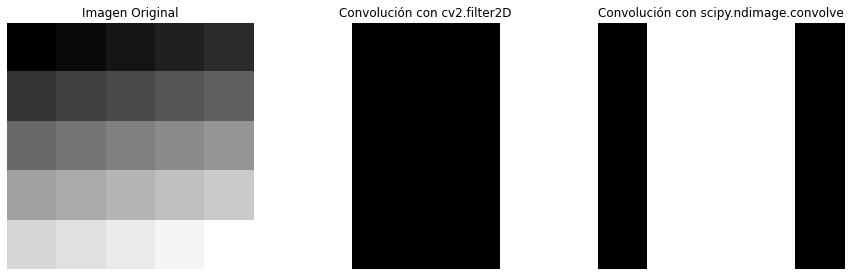

In [43]:
# Crear una imagen de prueba
img = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15],
                [16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25]], dtype=np.float32)

# Definir un kernel (máscara) de ejemplo
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

# Usar OpenCV (cv2.filter2D)
conv_cv2 = cv2.filter2D(img, -1, kernel)

# Usar SciPy (scipy.ndimage.convolve)
conv_scipy = convolve(img, kernel)

# Visualizar resultados
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Imagen Original")

ax[1].imshow(conv_cv2, cmap='gray')
ax[1].set_title("Convolución con cv2.filter2D")

ax[2].imshow(conv_scipy, cmap='gray')
ax[2].set_title("Convolución con scipy.ndimage.convolve")

for a in ax:
    a.axis('off')

plt.show()


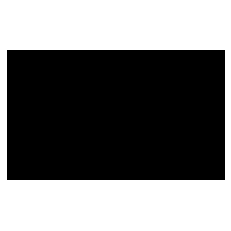

In [65]:
#cv2.imshow("hola",)
plt.imshow(cv2.filter2D(img,-1,kernel),cmap = "gray")
plt.axis('off')  # Ocultar los ejes
plt.show()

In [102]:
#cv2.filter2D(img,-1,kernel)

convolve(img,kernel,mode="mirror") #- 
correlate(img,kernel,mode="mirror")
#convolve(np.array([[1,4,1],[2,5,3]]),np.array([[0,-1,1],[-1,4,-1],[0,-1,0]]).T,mode="constant")-correlate(np.array([[1,4,1],[2,5,3]]),np.array([[0,-1,1],[-1,4,-1],[0,-1,0]]),mode="constant")

array([[ 0., -6., -6., -6.,  0.],
       [ 0., -6., -6., -6.,  0.],
       [ 0., -6., -6., -6.,  0.],
       [ 0., -6., -6., -6.,  0.],
       [ 0., -6., -6., -6.,  0.]], dtype=float32)